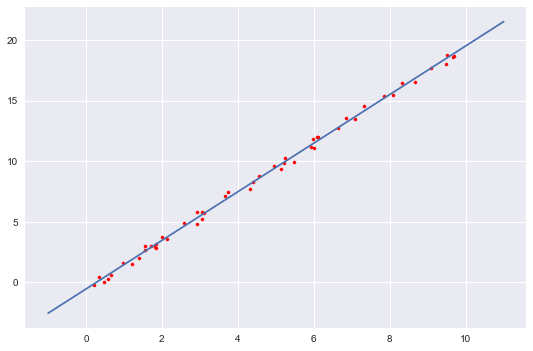

In [9]:
##3Simple linear regression
import seaborn as sns;import matplotlib.pyplot as plt;sns.set();import pandas as pd;import numpy as np
plt.style.use('seaborn')
np.random.seed(42)
x=10*np.random.rand(50)
y=2*x-1+np.random.rand(50)
plt.scatter(x,y,s=10,c='red');

from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
X=x[:,np.newaxis]
modelo.fit(X,y)
x2=np.linspace(-1,11)
X2=x2[:,np.newaxis]
y2=modelo.predict(X2)
plt.plot(x2,y2)

 


In [71]:
#Supervised learning:iris clasification
from sklearn.model_selection import train_test_split
iris=sns.load_dataset('iris')
print(iris)
X_iris=iris.drop('species',axis=1)
y_iris=iris['species']

X_train,X_test,y_train,y_test=train_test_split(X_iris,y_iris,random_state=1)

from sklearn.naive_bayes import GaussianNB

modelo=GaussianNB() ###Crear la instancia del modelo;El constructor de GaussianNB no tiene argumentos
modelo.fit(X_train,y_train)##Desarrollar el modelo desde los datos
y_modelo=modelo.predict(X_test)###Hacer la prediccion sobre nuevos datos haciendo uso del modelo entrenado
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_modelo)





AttributeError: 'DataFrame' object has no attribute 'target'

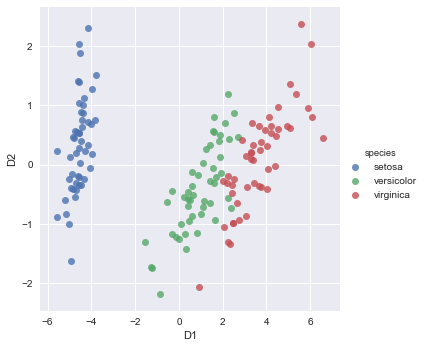

In [26]:
###unsupervised learning:iris dimensionality
from sklearn.decomposition import PCA
modelo=PCA(n_components=2)
modelo.fit(X_iris)
x2d=modelo.transform(X_iris)

iris['D1']=x2d[:,0]
iris['D2']=x2d[:,1]
sns.lmplot('D1','D2',iris,hue='species',fit_reg=False)

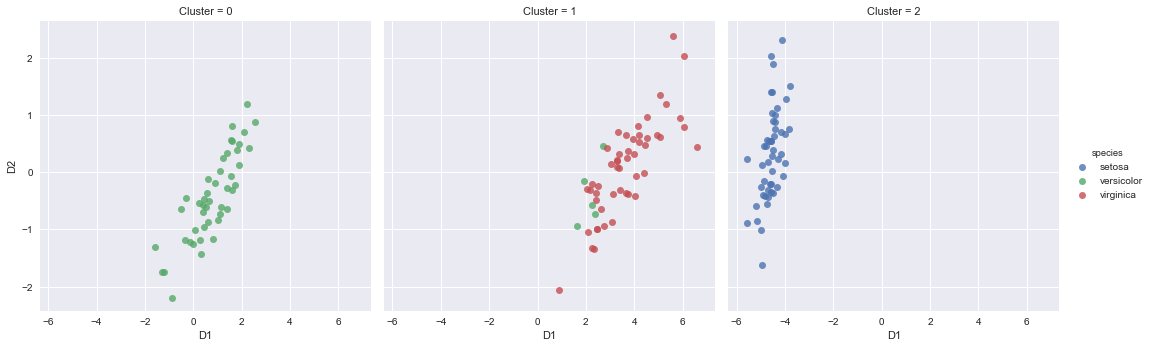

In [60]:
###unsupervised learning:iris clustering
from sklearn.mixture import GaussianMixture
modelo=GaussianMixture(n_components=3,covariance_type='full')
modelo.fit(X_iris)
y_cluster=modelo.predict(X_iris)
iris['Cluster']=y_cluster
sns.lmplot('D1','D2',iris,col='Cluster' , hue='species', fit_reg=False);



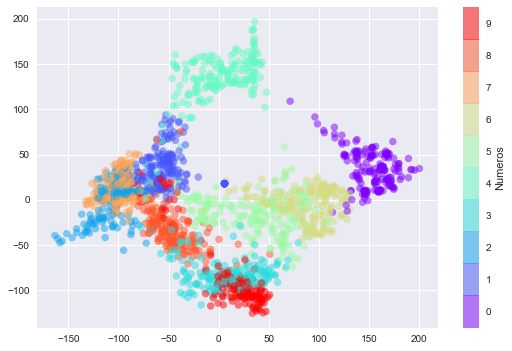

In [61]:
###Exploring Handwritten Digits
from sklearn.datasets import load_digits;import matplotlib.pyplot as plt
digitos=load_digits()

from sklearn.manifold import Isomap
modelo=Isomap(n_components=2)
modelo.fit(digitos.data)
reduccion=modelo.transform(digitos.data)
reduccion.shape

plt.scatter(reduccion[:,0],reduccion[:,1],c=digitos.target,cmap=plt.cm.get_cmap('rainbow', 10),alpha=0.5)
plt.colorbar(label='Numeros',ticks=range(10))
plt.clim(-0.5,9.5)




0.8311111111111111


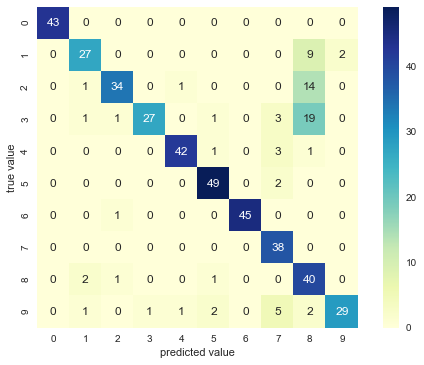

In [70]:
from sklearn.model_selection import train_test_split;from sklearn.naive_bayes import GaussianNB;from sklearn.metrics import accuracy_score

X=digitos.data
y=digitos.target

X_tr,X_te,y_tr,y_te=train_test_split(X,y)

modelo=GaussianNB()
modelo.fit(X_tr,y_tr)
y_predictivo=modelo.predict(X_te)

print(accuracy_score(y_te,y_predictivo))
#######MATRIZ DE CONFUSIÓN,SIRVE PARA OBSERVAR QUE SALIÓ MAL
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_te, y_predictivo)
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value');






In [116]:

#####VALIDACIÓN DEL MODELO--------------------------------

from sklearn.datasets import load_iris;from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score;from sklearn.model_selection import LeaveOneOut
model=KNeighborsClassifier(n_neighbors=1)
iris=load_iris()
X=iris.data
y=iris.target
X_train,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.75,random_state=0)
print(X_train.shape,ytrain.shape,ytest.shape,Xtest.shape)
model.fit(X_train,ytrain)
ymodelo=model.predict(Xtest)
print(accuracy_score(ytest,ymodelo))

modelo1=GaussianNB()
modelo1.fit(X_train,ytrain)
ymo=modelo1.predict(Xtest)
accuracy_score(ytest,ymo)
perro=cross_val_score(model,X,y,cv=5)
print(perro.mean())
scores=cross_val_score(model,X,y,cv=LeaveOneOut())
scores.mean()


(112, 4) (112,) (38,) (38, 4)
0.9736842105263158
0.96


0.96

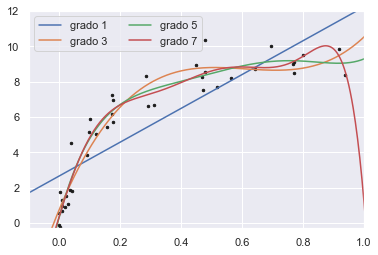

In [80]:
####Selección del modelo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression;from sklearn.pipeline import make_pipeline;import numpy as np;
import matplotlib.pyplot as plt;import seaborn as sns;sns.set() 
from sklearn.linear_model import Ridge

def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),
    LinearRegression())

def fabricar_datos(n_datos,error=1,semilla=1):
    rng=np.random.RandomState(semilla)
    X=rng.rand(n_datos,1)**2
    y=10 - 1. / (X.ravel() + 0.1)
    if error > 0:
        y += error * rng.randn(n_datos)
    return X, y

X,y=fabricar_datos(40)

Xtest=np.linspace(-0.1,1.1,500)[:,np.newaxis]
plt.scatter(X.ravel(),y,c='k',s=6)
plt.xlim(-0.1,1);plt.ylim(-0.3,12)


for grado in [1,3,5,7]:
    ytest=PolynomialRegression(grado).fit(X,y).predict(Xtest)
    plt.plot(Xtest.ravel(),ytest,label=f'grado {grado}')
    plt.legend(ncol=2)

from sklearn.model_selection import validation_curve
grado=np.arange(0,21)
train1_score, val1_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree',
grado, cv=7)








Text(0, 0.5, 'Rendimiento')

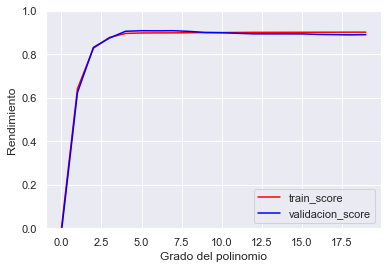

In [95]:
plt.plot(grado,np.median(train_score,axis=1),c='red',label='train_score')
plt.plot(grado,np.median(val_score,axis=1),c='blue',label='validacion_score')
plt.legend()
plt.ylim(0,1)
plt.xlabel('Grado del polinomio')
plt.ylabel('Rendimiento')###Apartir de la grafica se observa que la complexidad del modelo que mejor obtiene un resultado e
#en puntaje de validación es un polinomio de grado 3




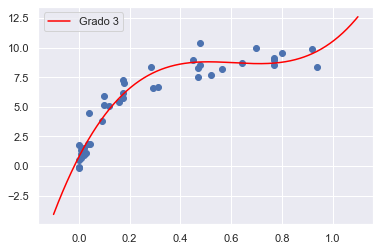

In [79]:
ymodelo=PolynomialRegression(3).fit(X,y).predict(Xtest)
plt.scatter(X.ravel(),y)
plt.plot(Xtest.ravel(),ymodelo,c='red',label='Grado 3')
plt.legend()


(0, 1)

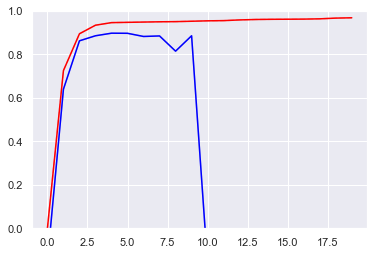

In [97]:
####Curvas de aprendizaje
import numpy as np
X,y=fabricar_datos(40)
#plt.scatter(X.ravel(),y,s=5)
grado=np.arange(0,20)
grado=np.arange(0,20)
train1_score, val1_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree',
grado, cv=7)
train_score,val_score=validation_curve(PolynomialRegression(),X,y,'polynomialfeatures__degree',grado,cv=7)

plt.plot(grado,np.mean(train_score,1),c='red')
plt.plot(grado,np.mean(val_score,1),c='blue')
plt.plot(grado,np.mean(train1_score,axis=1),c='red',label='train_score',alpha=0.2,linestyle='dashed')
plt.plot(grado,np.mean(val1_score,axis=1),c='blue',label='validacion_score',alpha=0.2)
plt.ylim(0,1)


C:\Users\SONY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 29 instead of 30).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 29 instead of 30).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


{'C': None,
 'break_ties': None,
 'cache_size': None,
 'class_weight': None,
 'coef0': None,
 'decision_function_shape': None,
 'degree': None,
 'gamma': None,
 'kernel': None,
 'max_iter': None,
 'probability': None,
 'random_state': None,
 'shrinking': None,
 'tol': None,
 'verbose': None}

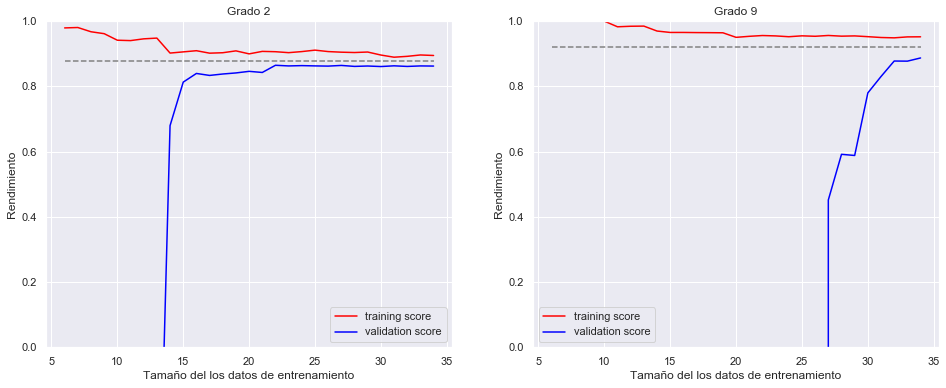

In [120]:
from sklearn.model_selection import learning_curve;import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(hspace=0.2,wspace=0.2)
grado=[2,9]

for i,grad in enumerate(grado):
        N,trainn_score,vall_score=learning_curve(PolynomialRegression(grad),X,y,cv=7,train_sizes=np.linspace(0.2,1,30))
        ax[i].plot(N,np.mean(trainn_score,1),c='red',label='training score')
        ax[i].plot(N,np.mean(vall_score,1),c='blue',label='validation score')
        ax[i].hlines(np.mean([trainn_score[-1],vall_score[-1]]),N[0],N[-1],color='grey',linestyles='dashed')
        ax[i].set_ylim(0,1)
        ax[i].set_xlabel('Tamaño del los datos de entrenamiento')
        ax[i].set_ylabel('Rendimiento')
        ax[i].legend()
        ax[i].set_title(f'Grado {grad}')

SVC.get_params(SVC)
        
        



In [23]:
###Caracteristicas categoricas
from sklearn.feature_extraction import DictVectorizer  ####  Cuando nuestros datos es una lista de diccionarios
import pandas as pd
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
vec=DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

##### Text Features

txt=['problem of evil',
'evil queen',
'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer

vec=CountVectorizer()
X=vec.fit_transform(txt)

pd.DataFrame(X.toarray(),columns=vec.get_feature_names())










,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


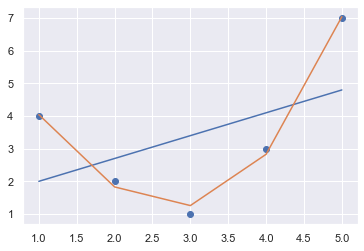

In [34]:
import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

modelo.fit(x[:,np.newaxis],y)
ymodelo=modelo.predict(x[:,np.newaxis])
plt.scatter(x,y)
plt.plot(x,ymodelo)
####Agregando caracteristicas polinomiales a los datos. No cambiar el modelo sino la forma de los datos
from sklearn.preprocessing import PolynomialFeatures

po=PolynomialFeatures(degree=3,include_bias=False)
X2=po.fit_transform(x[:,np.newaxis])
print(X2)
modelo.fit(X2,y)
y2modelo=modelo.predict(X2)
plt.plot(x,y2modelo)


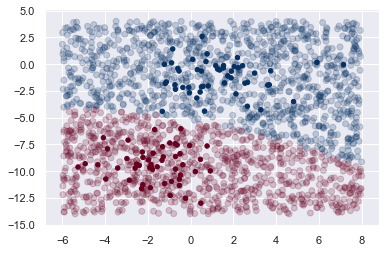

In [53]:
####33Naive Bayes Classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu');
from sklearn.naive_bayes import GaussianNB

modelo=GaussianNB()
modelo.fit(X,y)
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew=modelo.predict(Xnew)
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,alpha=0.2,cmap='RdBu')


In [77]:
>>> import numpy as np
>>> from sklearn.linear_model import SGDClassifier
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import make_pipeline

SGDClassifier.get_params(SGDClassifier)

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


{'alpha': None,
 'average': None,
 'class_weight': None,
 'early_stopping': None,
 'epsilon': None,
 'eta0': None,
 'fit_intercept': None,
 'l1_ratio': None,
 'learning_rate': None,
 'loss': None,
 'max_iter': None,
 'n_iter_no_change': None,
 'n_jobs': None,
 'penalty': None,
 'power_t': None,
 'random_state': None,
 'shuffle': None,
 'tol': None,
 'validation_fraction': None,
 'verbose': None,
 'warm_start': None}

Pendiente: 2.027208810360695


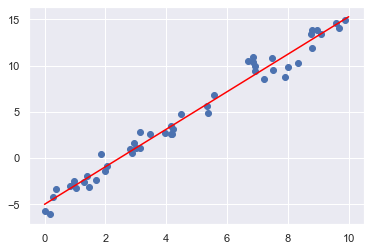

In [28]:
#####Linear Regression
import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
np.random.seed(1)
x=10*np.random.rand(50)
y=2*x-5+np.random.randn(50)
plt.scatter(x,y)
X=x[:,np.newaxis]
param_grid=[{'fit_intercept':[True,False]},{'normalize':[True,False]}]
modelo=GridSearchCV(estimator=LinearRegression(),param_grid=param_grid,cv=7)
Modelo=LinearRegression(fit_intercept=True,normalize=True)
#modelo=modelo.fit(X,y)
Modelo.fit(X,y)
#print(modelo.best_estimator_)
Xtest=np.linspace(0,10,100)
ymodelo=Modelo.predict(Xtest[:,np.newaxis])
plt.plot(Xtest,ymodelo,c='red')
print(f'Pendiente: {Modelo.coef_[0]}')




0.8973206085093206

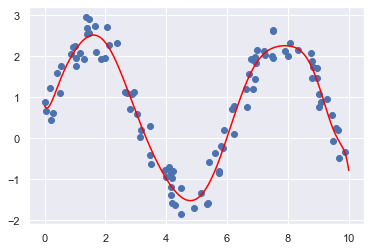

In [42]:
###Agregando caracteristicas polinomiales a una regresión lineal

from sklearn.preprocessing import PolynomialFeatures;import numpy as np;np.random.seed(1)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
x=np.array([2,3,4])
xfit = np.linspace(0, 10, 1000)
poli=PolynomialFeatures(degree=3,include_bias=False)
poli.fit_transform(x[:,np.newaxis])
poli_model=make_pipeline(PolynomialFeatures(13),LinearRegression())
x=10*np.random.rand(100)
y=2*np.sin(x)+np.random.rand(100)
plt.scatter(x,y)
X_train=x[:,np.newaxis]
poli_model.fit(X_train,y)
y_modelo=poli_model.predict(xfit[:,np.newaxis])
plt.plot(xfit,y_modelo,c='red')
scores=cross_val_score(poli_model,X_train,y,cv=7)
scores.mean()


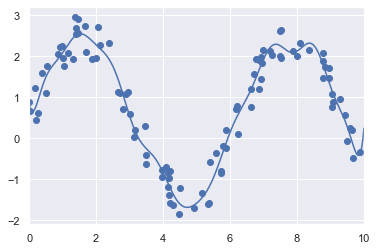

In [39]:
####Gaussian basis functions
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator,TransformerMixin):
    
    def __init__(self,N,width_factor=2):
        self.N=N
        self.width_factor=width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
    # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);


C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.96955875921699, tolerance: 0.017144964551205222
  positive)


0.8973206085093206

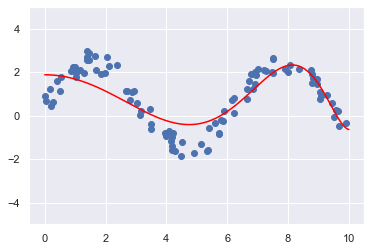

In [59]:
####Regularization;;;Ridge regression (L2 regularization)

from sklearn.preprocessing import PolynomialFeatures;import numpy as np;np.random.seed(1)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
x=np.array([2,3,4])
xfit = np.linspace(0, 10, 1000)
poli=PolynomialFeatures(degree=3,include_bias=False)
poli.fit_transform(x[:,np.newaxis])
poli_model=make_pipeline(PolynomialFeatures(13),LinearRegression())
x=10*np.random.rand(100)
y=2*np.sin(x)+np.random.rand(100)
plt.scatter(x,y)
X_train=x[:,np.newaxis]
modelo=make_pipeline(PolynomialFeatures(15),Lasso(alpha=1))

modelo.fit(X_train,y)
y_modelo=modelo.predict(xfit[:,np.newaxis])
plt.plot(xfit,y_modelo,c='red')
plt.ylim(-5,5)
scores=cross_val_score(poli_model,X_train,y,cv=7)
scores.mean()



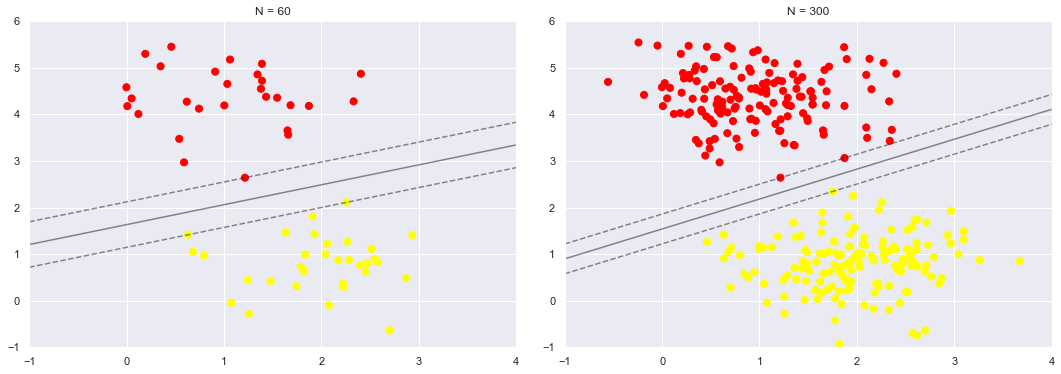

interactive(children=(Dropdown(description='N', options=(50, 200), value=50), Output()), _dom_classes=('widget…

In [43]:
from sklearn.datasets import make_blobs;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
import numpy as np;from sklearn.svm import SVC



def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_svm(N=50, ax=None):
    X, y = make_blobs(n_samples=300, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60,300]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

from ipywidgets import interact, fixed
interact(plot_svm, N=[50, 200], ax=fixed(None));
    


In [57]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
X,y=make_circles(100,noise=.1,factor=0.1)
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

C:\Users\SONY\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\SONY\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\SONY\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


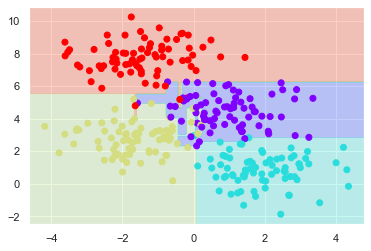

In [2]:
####Random forest treess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
#######Decision Trees##########################
X,y=make_blobs(n_samples=300,random_state=0,centers=4,cluster_std=1)

tree=DecisionTreeClassifier().fit(X,y)
def visualizar_clasificador(modelo,X,y,ax=None,cmap='rainbow'):
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    modelo.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap, clim=(y.min(), y.max()),
    zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    
visualizar_clasificador(DecisionTreeClassifier(), X, y)

C:\Users\SONY\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


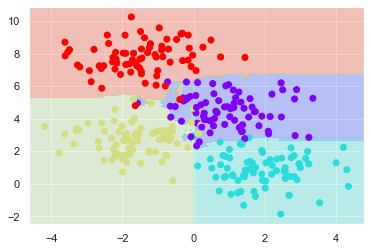

In [4]:
######  Random forest clasifier--------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
modelo=RandomForestClassifier(n_estimators=100,random_state=0)
tree=DecisionTreeClassifier()
bolsa=BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)
visualizar_clasificador(modelo,X,y)

array([0.98047252, 0.97128007, 0.97275104, 0.95142467, 0.98266303,
       0.97634977, 0.97448891])

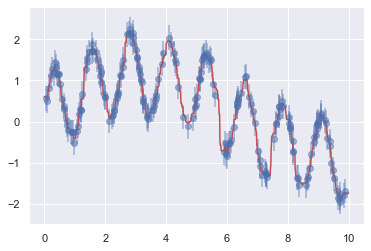

In [17]:
#####   Random Forest Regression---------------------------
import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=10*np.random.rand(200)
def modelo(x,sigma=0.3):
    f_oscilacion=np.sin(5*x)
    l_oscilacion=np.sin(0.5*x)
    noise=sigma*np.random.rand(len(x))
    return f_oscilacion+l_oscilacion+noise

y=modelo(x)

plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
forest=RandomForestRegressor(200)
forest.fit(x[:,np.newaxis],y)
xfit=np.linspace(0,10,1000)
yfit=forest.predict(xfit[:,np.newaxis])
ytrain=modelo(xfit,sigma=0)
plt.plot(xfit,yfit,'-r')
from sklearn.model_selection import cross_val_score
cross_val_score(forest,x[:,np.newaxis],y,cv=7)


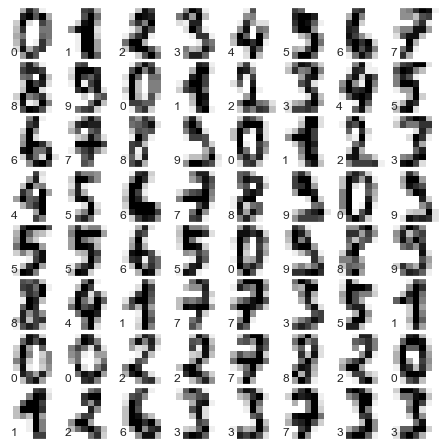

In [37]:
##############333Random Forest for Classifying Digits
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
digitos=load_digits()
digitos.keys()

fig,ax=plt.subplots(8,8,figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i,axi in enumerate(ax.flat):
    axi.imshow(digitos.images[i],cmap=plt.cm.binary, interpolation='nearest')
    axi.set(xticks=[],yticks=[])
    axi.text(0,7,str(digitos.target[i]))
    
Xtrain,Xtest,ytrain,ytest=train_test_split(digitos.data,digitos.target,random_state=0)
modelo=RandomForestClassifier(n_estimators=100)
modelo.fit(Xtrain,ytrain)
ymodelo=modelo.predict(Xtest)



              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        43
           2       1.00      0.95      0.98        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.94      0.96      0.95        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.98      0.98        48
           9       0.96      0.96      0.96        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

0.9777777777777777


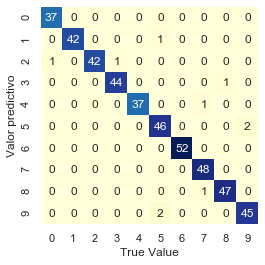

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(ytest,ymodelo))
sns.heatmap(confusion_matrix(ytest,ymodelo),square=True,annot=True,cmap='YlGnBu',fmt='d',cbar=False)
plt.xlabel('True Value')
plt.ylabel('Valor predictivo')
print(accuracy_score(ytest,ymodelo))


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


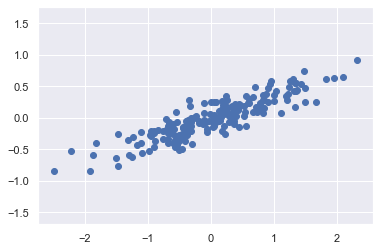

In [49]:
################Principal component analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
rng = np.random.RandomState(1)
X=np.dot(rng.rand(2, 2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
print(pca.components_)


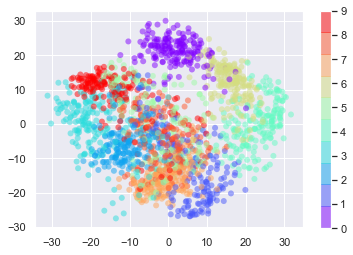

In [59]:
from sklearn.datasets import load_digits
digitos=load_digits()
digitos.data.shape
pca=PCA(2)

proyeccion=pca.fit_transform(digitos.data)
proyeccion.shape

plt.scatter(proyeccion[:,0],proyeccion[:,1],c=digitos.target,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 10),edgecolor='none')
plt.colorbar()

49


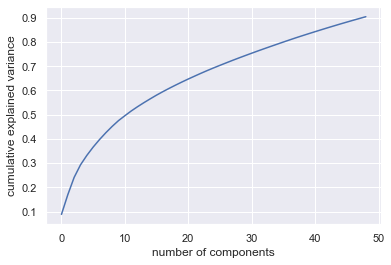

In [70]:
pca = PCA().fit(digitos.data)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

np.random.seed(42)
noisy = np.random.normal(digitos.data, 4)
pca = PCA(0.9).fit(noisy)
print(pca.n_components_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

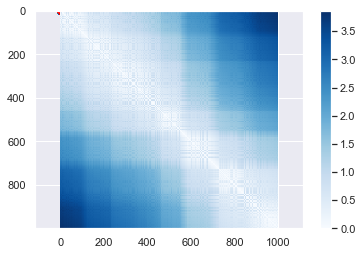

In [12]:
##############3Manifold Learning----------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
##################   Manifold Learning: “HELLO”
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize,alpha=0.5)
plt.axis('equal');

from sklearn.metrics import pairwise_distances

D=pairwise_distances(X)
D.shape
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();



(-1.0390064107727583,
 1.0377133989963172,
 -2.0646660054511305,
 2.135458244484913)

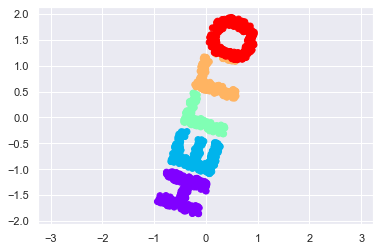

In [16]:
from sklearn.manifold import MDS
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
modelo=MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out=modelo.fit_transform(D)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')

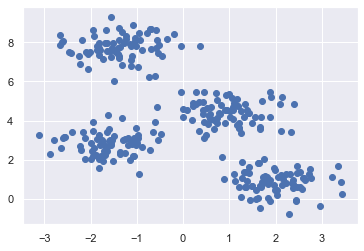

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
from sklearn.cluster import KMeans;from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],cmap='rainbow')
modelo=KMeans(n_clusters=4)
modelo.fit(X)
y_predict=modelo.predict(X)



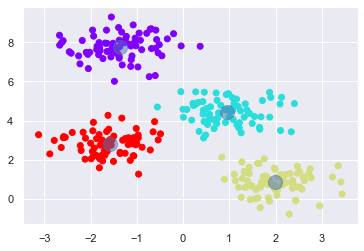

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_predict,cmap='rainbow')
centros=modelo.cluster_centers_
plt.scatter(centros[:,0],centros[:,1],s=200,alpha=0.5)

In [28]:
import numpy as np
rng = np.random.RandomState(2)
i = rng.permutation(300)
indices_centros=i[np.random.randint(0,300,size=(4))]
indices_centros
np.zeros_like?

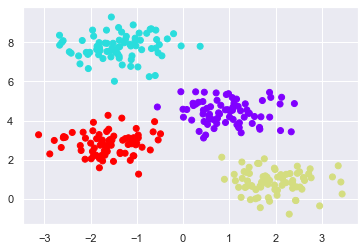

In [27]:
import numpy as np;from sklearn.metrics import pairwise_distances_argmin

def make_cluster(X,n_cluster,seed=2):
    rng=np.random.RandomState(seed)
    i=rng.permutation(X.shape[0])[:n_cluster]
    centros=X[i]
    
    while True:
        label=pairwise_distances_argmin(X,centros)
        nuevos_centros=np.array([X[label==i].mean(0) for i in range(n_cluster)])
        if(np.all(centros==nuevos_centros)):
            break
        centros=nuevos_centros
    return centros,label

centros,label=make_cluster(X,4)
plt.scatter(X[:,0],X[:,1],c=label,cmap='rainbow')
        
    
    

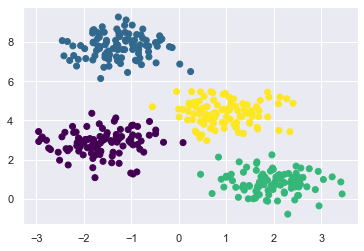

In [9]:
###################Gaussian mixture
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs;from sklearn.cluster import KMeans

X,y=make_blobs(centers=4,n_samples=400,random_state=0,cluster_std=0.6)
modelo=KMeans(4,random_state=0)
y_modelo=modelo.fit(X).predict(X)
plt.scatter(X[:,0],X[:,1],c=y_modelo,cmap='viridis')
from scipy.spatial.distance import cdist


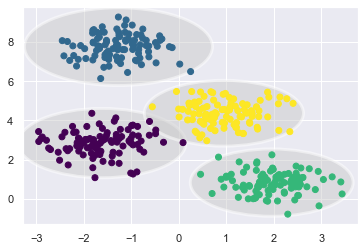

In [16]:
from scipy.spatial.distance import cdist;import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs;from sklearn.cluster import KMeans

def dibujar_circulos(modelo,X,n_centros=4,rseed=0,ax=None):
    ax=ax or plt.gca()
    y_fit=modelo.fit(X).predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_fit,cmap='viridis',zorder=2)
    centros=modelo.cluster_centers_
    radios=[cdist(X[y_fit==i],[centro]).max() for i,centro in enumerate(centros)]
    
    for c,r in zip(centros,radios):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

modelo=KMeans(n_clusters=4,random_state=0)
dibujar_circulos(modelo,X)
    


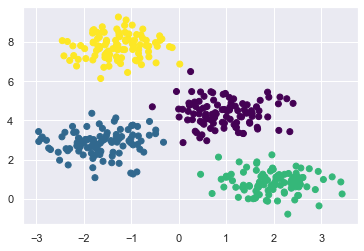

In [17]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis')

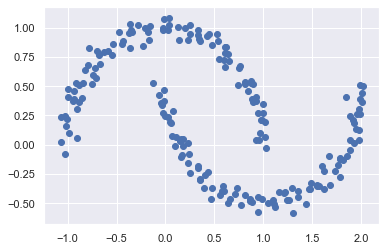

In [23]:
##################33GMM as Density Estimation22222222222
from sklearn.datasets import make_moons;from sklearn.mixture import GaussianMixture
X,y=make_moons(noise=0.05,random_state=0,n_samples=200)
labels=GaussianMixture(n_components=3,random_state=0).fit(X).predict(X)
plt.scatter(X[:,0],X[:,1])

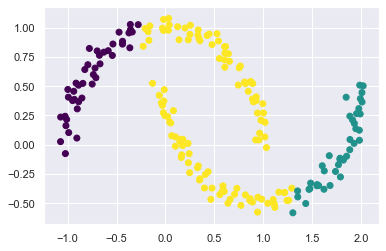

In [24]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis')

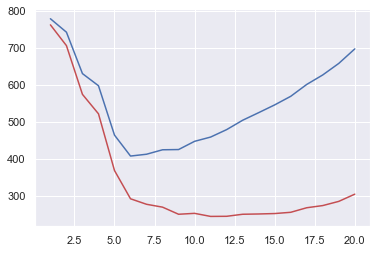

In [33]:
############333How many components? 
from sklearn.mixture import GaussianMixture;import numpy as np;from sklearn.datasets import make_moons
Xmoon,ymoon=make_moons(n_samples=200,noise=0.05,random_state=0)
n_sampless=np.arange(1,21);
modelos=[GaussianMixture(n,random_state=0).fit(Xmoon) for n in n_sampless]

plt.plot(n_sampless,[m.bic(Xmoon) for m in modelos])
plt.plot(n_sampless,[m.aic(Xmoon) for m in modelos],c='r')


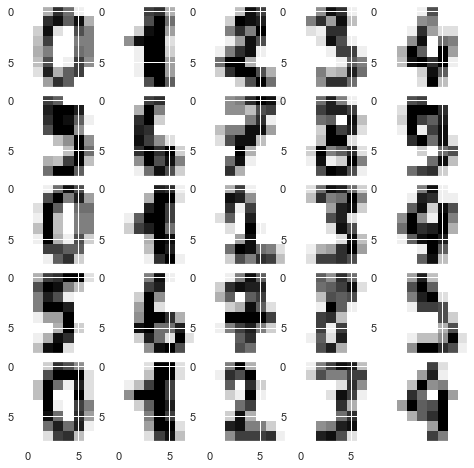

In [19]:
#### GMM para generar nuevos datos
from sklearn.datasets import load_digits;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
digitos=load_digits()
digitos.data.shape



def mostrar_numeros(Data):
    fig,ax=plt.subplots(5,5,figsize=(8,8))
    fig.subplots_adjust(hspace=0.1,wspace=0.1)
    plt.xticks([])
    plt.yticks([])
    
    for i,axis in enumerate(ax.flat):
        axis.imshow(Data[i].reshape(8,8),cmap='binary').set_clim(0, 16)
        
    
mostrar_numeros(digitos.data)
    

(1797, 41)


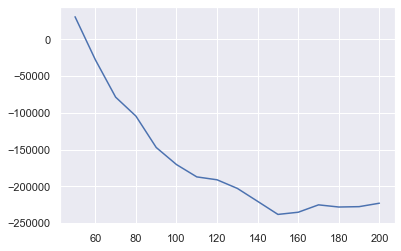

In [31]:
from sklearn.decomposition import PCA;from sklearn.mixture import GaussianMixture
pca=PCA(0.99,whiten=True)
data=pca.fit_transform(digitos.data)
print(data.shape)

n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);
